# Importing Neccessary library Dependencies

In [188]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score
from sklearn.preprocessing import LabelEncoder

In [189]:
#Importing the Dataset
spam_dataset= pd.read_csv('spam.csv', encoding='latin-1')

In [190]:
spam_dataset

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [191]:
# Shape of our dataset
spam_dataset.shape

(5572, 5)

In [192]:
# Dropping unnecessary columns and renaming the columns for our ease
spam_dataset.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis = 1,inplace=True)
spam_dataset.rename(columns={'v1' : 'Target','v2' : 'Text'},inplace=True)

In [193]:
# Checking for Null Values in the dataset
spam_dataset.isnull().sum()

Target    0
Text      0
dtype: int64

In [194]:
# Summary of our Numerical Columns
spam_dataset.describe()

,Target,Text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [195]:
spam_dataset

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


<Axes: xlabel='Target', ylabel='count'>

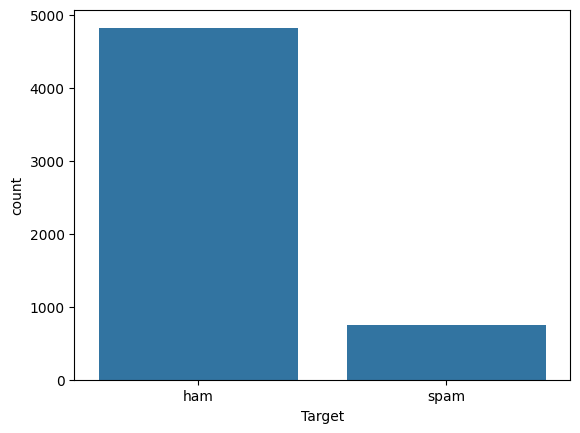

In [196]:
# Checking the balance of the dataset
sns.countplot(data= spam_dataset, x='Target')

In [197]:
spam_dataset['Length'] = spam_dataset['Text'].apply(len)
spam_dataset

,Target,Text,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161
5568,ham,Will Ì_ b going to esplanade fr home?,37
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


In [198]:
spam_dataset.sort_values(by='Length').tail(5)

,Target,Text,Length
2157,ham,Sad story of a Man - Last week was my b'day. M...,588
1578,ham,How to Make a girl Happy? It's not at all diff...,611
2433,ham,Indians r poor but India is not a poor country...,632
1862,ham,The last thing i ever wanted to do was hurt yo...,790
1084,ham,For me the love should start with attraction.i...,910


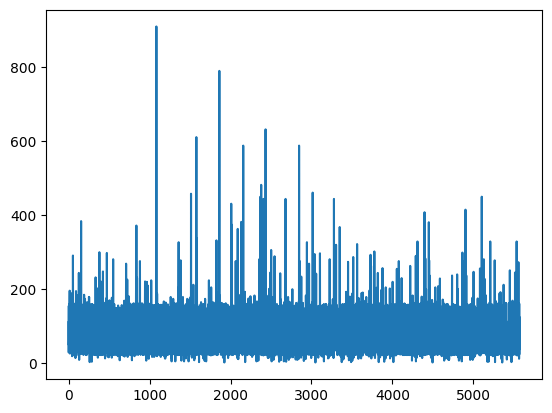

In [199]:
plt.plot(spam_dataset.index,spam_dataset['Length'])

<Axes: ylabel='Length'>

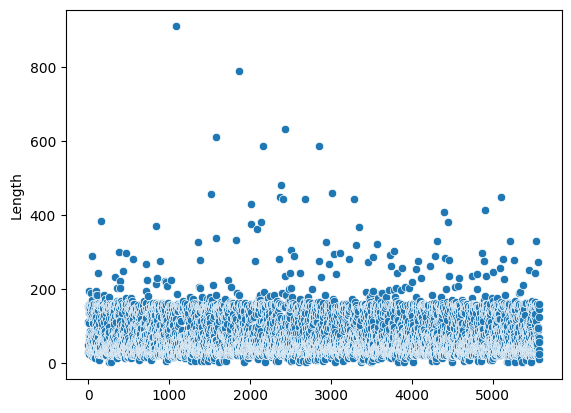

In [200]:
sns.scatterplot(spam_dataset['Length'])

<Axes: >

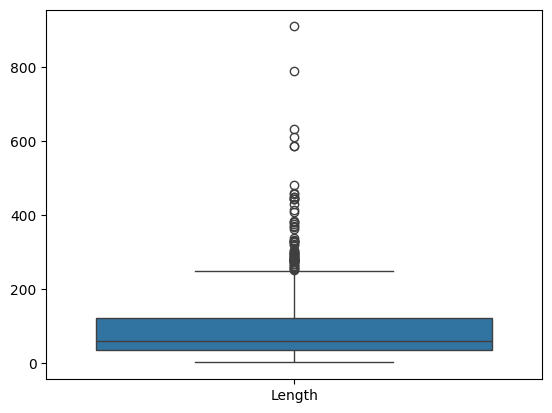

In [201]:
sns.boxplot(spam_dataset)

In [202]:
spam_text = spam_dataset[spam_dataset['Target'] == 'spam']

In [203]:
print("Average length of Spam Texts :",sum(spam_text['Length'])/spam_text.shape[0])

Average length of Spam Texts : 138.8661311914324


In [204]:
ham_text = spam_dataset[spam_dataset['Target'] == 'ham']
print("Average length of ham Texts :",sum(ham_text['Length'])/ham_text.shape[0])

Average length of ham Texts : 71.02362694300518


In [205]:
# Creating Wordclouds to see the frequent words in ham and spam 
from wordcloud import WordCloud
s_text = ''.join(spam_text['Text'])

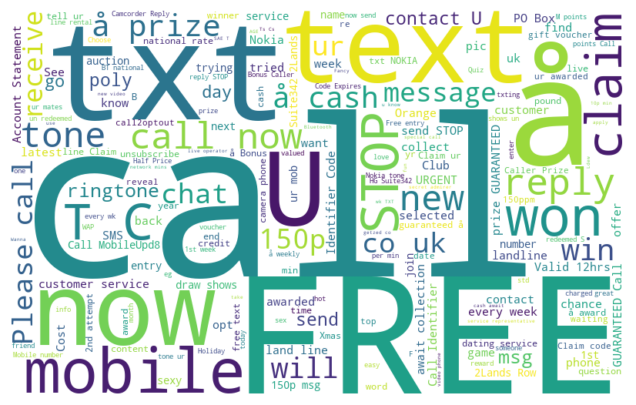

In [206]:
# Wordcloud for spam text
wordcloud=WordCloud(width=800,height=500,background_color='white').generate(s_text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

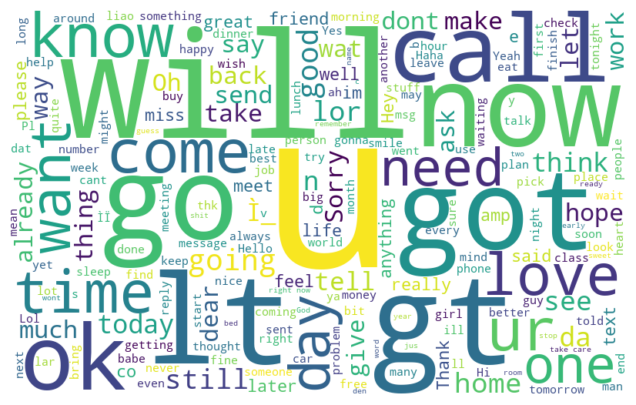

In [207]:
#Wordcloud for ham text
h_text= ''.join(ham_text['Text'])
wordcloud=WordCloud(width=800,height=500,background_color='white').generate(h_text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

# Preprocessing


###  Label encoding For target variables <br>
#### Label Encoding is a technique that is used to convert categorical columns into numerical ones so that they can be fitted by machine learning models which only take numerical data. It is an important pre-processing step in a machine-learning project.



In [208]:
Lb = LabelEncoder()
spam_dataset['Target'] = Lb.fit_transform(spam_dataset['Target'])

In [209]:
print(spam_dataset['Target'],Lb.inverse_transform(spam_dataset['Target']))

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Target, Length: 5572, dtype: int32 ['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']


In [210]:
spam_dataset

,Target,Text,Length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [211]:
# Dividing the dataset into Features and target variables 
X = spam_dataset['Text']
Y = spam_dataset['Target']

In [212]:
# Function to lower the text
def lower(X):
    for i in range(X.shape[0]):
        X[i] = X[i].lower()
    return X

In [213]:
X = lower(X)

C:\Users\vinay\AppData\Local\Temp\ipykernel_23464\892367600.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i] = X[i].lower()
C:\Users\vinay\AppData\Local\Temp\ipykernel_23464\892367600.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i] = X[i].lower()
C:\Users\vinay\AppData\Local\Temp\ipykernel_23464\892367600.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i] = X[i].lower()
C:\Users\vinay\AppData\Local\Temp\ipykernel

In [214]:
# Splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=42)

In [215]:
X_train

708     to review and keep the fantastic nokia n-gage ...
4338                   just got outta class gonna go gym.
5029    is there coming friday is leave for pongal?do ...
4921    hi dear call me its urgnt. i don't know whats ...
2592    my friend just got here and says he's upping h...
                              ...                        
3772    i came hostel. i m going to sleep. plz call me...
5191                               sorry, i'll call later
5226        prabha..i'm soryda..realy..frm heart i'm sory
5390                           nt joking seriously i told
860                   in work now. going have in few min.
Name: Text, Length: 3900, dtype: object

# Feature Extraaction

In [216]:
Feature_extraction = TfidfVectorizer(min_df=1,stop_words='english',lowercase=True)
X_train_features = Feature_extraction.fit_transform(X_train)
X_test_features = Feature_extraction.transform(X_test)


y_train = y_train.astype('int')
y_test = y_test.astype('int')

## Modeling

In [217]:
model = LogisticRegression()

In [218]:
model.fit(X_train_features,y_train)

LogisticRegression()

## Evaluating the model

In [219]:
model.predict(X_train_features)

array([1, 0, 0, ..., 0, 0, 0])

In [220]:
confusion_matrix(y_train,model.predict(X_train_features))

array([[3370,    2],
       [ 127,  401]], dtype=int64)

In [221]:
accuracy_score(y_train,model.predict(X_train_features))

0.9669230769230769

In [225]:
f1_score(y_train,model.predict(X_train_features))

0.8614393125671321

In [222]:
confusion_matrix(y_test,model.predict(X_test_features))

array([[1450,    3],
       [  76,  143]], dtype=int64)

In [223]:
accuracy_score(y_test,model.predict(X_test_features))

0.9527511961722488

In [226]:
f1_score(y_test,model.predict(X_test_features))

0.7835616438356166

## Predictive system

In [224]:
input_mail = ["Hey sale"]

input_data_features = Feature_extraction.transform(input_mail)

predictions = model.predict(input_data_features)
Type = Lb.inverse_transform(predictions)
print(Type[0])

ham
